In [2]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
from matplotlib import pyplot as plt
from random import sample

In [3]:
'''People providing an organ for donation sometimes seek the help of a special "medical consultant". 
These consultants assist the patient in all aspects of the surgery, with the goal of reducing
the possibility of complications during the medical procedure and recovery. Patients might choose
a consultant based in part on the historical complication rate of the consultant's clients. One consultant 
tried to attract patients by noting the average complication rate for liver donor surgeries in
the US is about 10%, but her clients have only had 3 complications in the 62 liver donor surgeries
she has facilitated. She claims this is strong evidence that her work meaningfully contributes to
reducing complications (and therefore she should be hired!).
H0: there's no association between the consultant's contributions and the client's complication rate.
HA: patients who work with the consultant have a lower rate of complication rate than %10
'''

patients = 62 # consultant's 62 clients
comp_rate = .10 # claimed US general complication rate claimed by the consultant, which will be H0
not_comp_rate = 1 - comp_rate 
prop_list = list() # empty list for the simulated proportions
sim_num = 10000 # how many times we'll simulate
cons_rate = 3 / patients # consultant's claimed complication rate
print("consultant's complication rate",cons_rate)

for i in range(0,sim_num):
    x = np.array(["complication", "not"]) # creating an array of possible outcomes
    possible_entries = np.repeat(x, [comp_rate*10, not_comp_rate*10], axis=0) # the array for possible entries
    sampled_entries = list()
    for i in range(0,patients):
        sampled_entry = random.sample(list(possible_entries), k=1)[0] # sampling from the possible entries
        sampled_entries.append(sampled_entry) # appending the sample to a list
    prop = sampled_entries.count('complication')/patients # calculate proportion rate from the sampled entry list
    prop_list.append(prop) # add the proportion to the proportion list
print("OVERVIEW TO THE PROPORTIONS IN SIMULATION: ",prop_list[0:10])

# LEFT TAIL calculation. the observations which is less than phat. 
def condition(x):
    return x<=cons_rate
left_tail = sum(condition(x) for x in prop_list) / sim_num
print("LEFT TAIL PROBABILITY: ",left_tail)
print('''since it's greater than our significance level of 0.05, we can not reject H0 and conclude:
the data does not provide convincing evidence about an association between the consultant's work and fewer surgery complications''')

consultant's complication rate 0.04838709677419355
OVERVIEW TO THE PROPORTIONS IN SIMULATION:  [0.06451612903225806, 0.14516129032258066, 0.11290322580645161, 0.16129032258064516, 0.0967741935483871, 0.03225806451612903, 0.04838709677419355, 0.0967741935483871, 0.12903225806451613, 0.12903225806451613]
LEFT TAIL PROBABILITY:  0.1168
since it's greater than our significance level of 0.05, we can not reject H0 and conclude:
the data does not provide convincing evidence about an association between the consultant's work and fewer surgery complications


(array([ 107., 1061., 2777., 3200., 1942.,  711.,  168.,   27.,    7.]),
 array([0.        , 0.03046595, 0.0609319 , 0.09139785, 0.1218638 ,
        0.15232975, 0.1827957 , 0.21326165, 0.2437276 , 0.27419355]),
 <BarContainer object of 9 artists>)

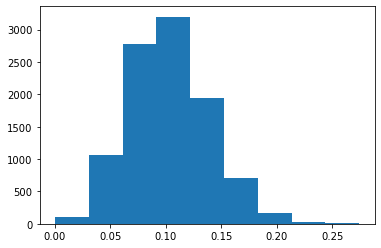

In [5]:
plt.hist(prop_list,9)

In [10]:
# generating the exact null distribution and p-value // binomial distribution
n = 62
k = 3 # we want to calculate probabilities for 3 or less complications.
p = .1  # null hypothesis, national average
minusp = 1 - p
a = list()
for j in range(0,k):
    calc = math.comb(n,j) * (p**j) * minusp**(n-j)
    a.append(calc) # i think watching inside a list is better because we can see the components easily with hashing. 

print(sum(a)," as seen, the two p-values generated with the first method and the binomial distribution calculation are so close.")

0.045464360587835186  as seen, the two p-values generated with the first method and the binomial distribution calculation are so close.
